# FIFA 21 Data Analysis

## Importing Libraries and Loading Data

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
sns.set(style="darkgrid")
plt.style.use("dark_background")

In [22]:
# Load data and set display options
df = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

## Data Exploration

### Shape of our Dataset
    - Start by checking the number of rows and columns that exist in the raw dataset.
    - Using Dataframe.shape command, the output is a tuple: (x, y), where x denotes the number of rows and y denotes the number of columns 

In [23]:
df.shape

(18944, 106)

## Data Cleaning

In [24]:
# Drop columns with more than 30% null values
threshold = len(df) * 0.30
df = df.dropna(thresh=len(df) - threshold, axis=1)

# Remove duplicates based on 'short_name'
df = df.drop_duplicates(subset=['short_name'])

In [25]:
# Combine skill columns
skill_categories = {
    'goalkeeping': ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                    'goalkeeping_positioning', 'goalkeeping_reflexes'],
    'defending': ['defending_standing_tackle', 'defending_sliding_tackle'],
    'mentality': ['mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
                    'mentality_vision', 'mentality_penalties', 'mentality_composure'],
    'power': ['power_shot_power', 'power_jumping', 'power_stamina',
                'power_strength', 'power_long_shots'],
    'movement': ['movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                    'movement_reactions', 'movement_balance'],
    'skill': ['skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
                'skill_long_passing', 'skill_ball_control'],
    'attacking': ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                    'attacking_volleys', 'attacking_short_passing']
}

for category, cols in skill_categories.items():
    if all(col in df.columns for col in cols):
        df[category] = df[cols].mean(axis=1).round(2)
        df = df.drop(cols, axis=1)


In [26]:
# Calculate BMI
df['bmi'] = (df['weight_kg'] / ((df['height_cm'] / 100) ** 2)).round(2)
df = df.drop(columns=['height_cm', 'weight_kg'])

In [27]:
# Keep only necessary columns
columns_to_keep = [
    'short_name', 'age', 'bmi', 'club_name', 'league_name', 'league_rank',
    'overall', 'potential', 'value_eur', 'player_positions', 'team_position', 'preferred_foot', 
    'international_reputation', 'release_clause_eur', 'contract_valid_until', 
    'goalkeeping', 'defending', 'movement', 'attacking'
]
df = df.loc[:, columns_to_keep]

### Outlier Removal

In [28]:
df.describe()

,age,bmi,league_rank,overall,potential,value_eur,international_reputation,release_clause_eur,contract_valid_until,goalkeeping,defending,movement,attacking
count,17884.000000,17884.000000,17663.000000,17884.000000,17884.000000,1.788400e+04,17884.000000,1.693500e+04,17663.000000,17884.000000,17884.000000,17884.000000,17884.000000
mean,25.270074,22.820252,1.353394,65.854619,71.196097,2.302948e+06,1.095840,4.451805e+06,2021.981487,16.310110,46.714661,63.579971,49.913397
std,4.686799,1.354242,0.732015,7.012208,6.118502,5.225403e+06,0.369815,1.030477e+07,1.251948,16.978634,21.093855,11.215139,14.923465
min,16.000000,17.360000,1.000000,47.000000,47.000000,0.000000e+00,1.000000,9.000000e+03,2020.000000,1.000000,6.000000,24.400000,8.400000
25%,22.000000,21.910000,1.000000,61.000000,67.000000,3.000000e+05,1.000000,5.360000e+05,2021.000000,9.600000,26.000000,57.800000,44.600000
50%,25.000000,22.840000,1.000000,66.000000,71.000000,6.500000e+05,1.000000,1.200000e+06,2022.000000,10.600000,53.500000,65.400000,52.600000
75%,29.000000,23.670000,1.000000,70.000000,75.000000,1.800000e+06,1.000000,3.400000e+06,2023.000000,12.000000,64.500000,71.200000,59.600000
max,53.000000,34.720000,4.000000,93.000000,95.000000,1.055000e+08,5.000000,2.031000e+08,2028.000000,88.000000,89.500000,92.800000,87.400000


In [29]:
# columns = ['age', 'bmi', 'league_rank', 'overall', 'potential',	'value_eur', 'international_reputation', 'release_clause_eur', 'contract_valid_until', 'goalkeeping', 'defending', 'movement', 'attacking']

# for col in columns:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]


## Data Analysis

### Age Distribution Analysis

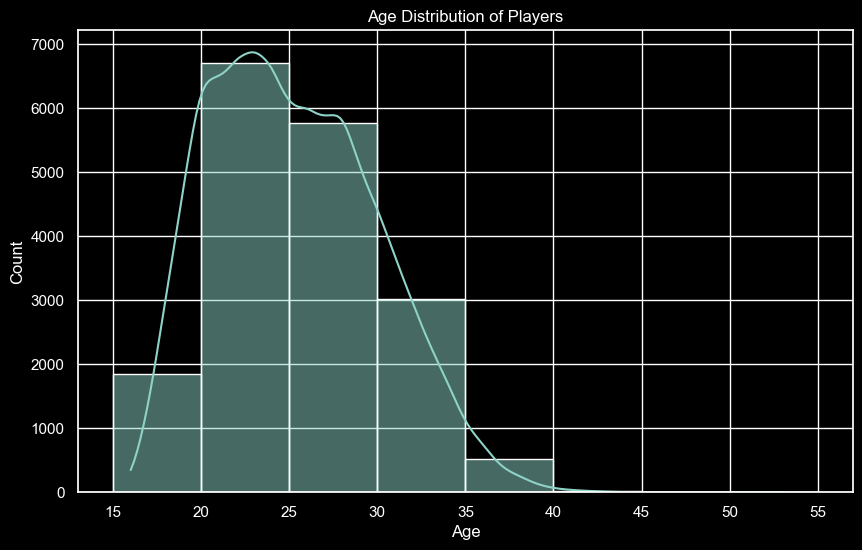

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=range(15, 60, 5), kde=True)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Age vs Player Positions Analysis

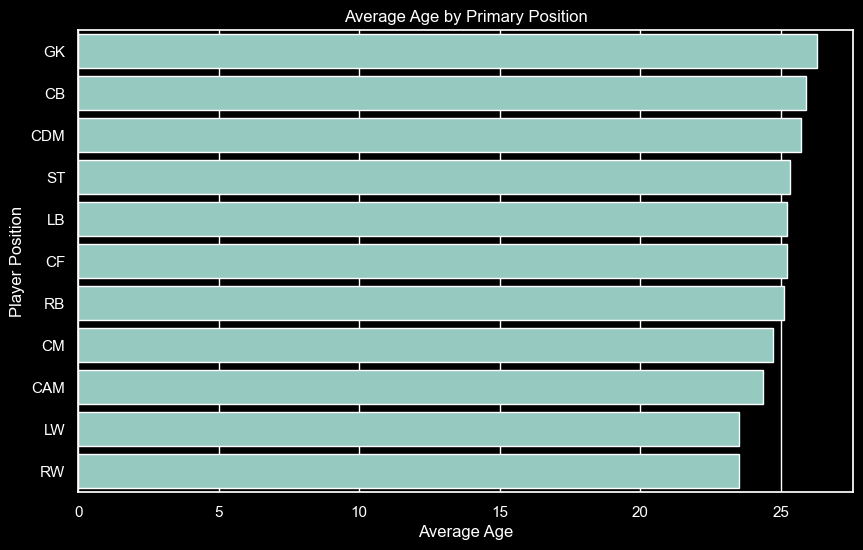

In [31]:
position_mapping = {
    'RWB': 'RB', 'LWB': 'LB',
    'RM': 'CM', 'LM': 'CM'
}
df['primary_position'] = df['player_positions'].apply(lambda x: position_mapping.get(x.split(',')[0].strip(), x.split(',')[0].strip()))
position_age = df.groupby('primary_position')['age'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='primary_position', data=position_age)
plt.title('Average Age by Primary Position')
plt.xlabel('Average Age')
plt.ylabel('Player Position')
plt.show()

### Value_EUR vs Player Positions Analysis

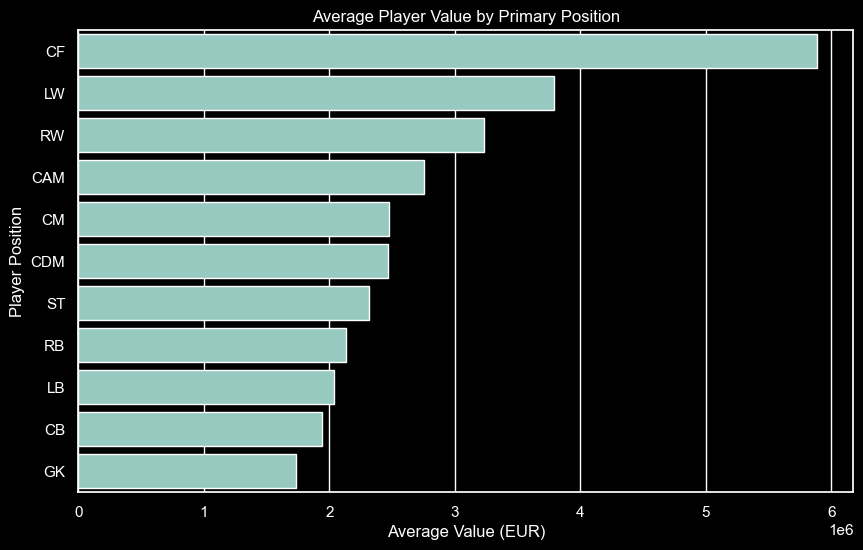

In [32]:
position_value = df.groupby('primary_position')['value_eur'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='value_eur', y='primary_position', data=position_value)
plt.title('Average Player Value by Primary Position')
plt.xlabel('Average Value (EUR)')
plt.ylabel('Player Position')
plt.show()

### Value_EUR vs Release Clause Analysis

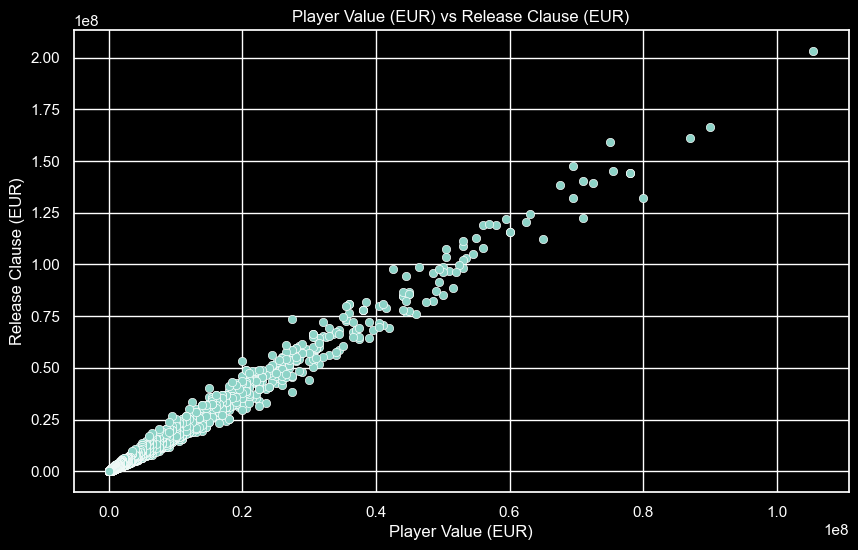

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value_eur', y='release_clause_eur', data=df)
plt.title("Player Value (EUR) vs Release Clause (EUR)")
plt.xlabel("Player Value (EUR)")
plt.ylabel("Release Clause (EUR)")
plt.show()

### Value_EUR vs Top 7 Performances Analysis

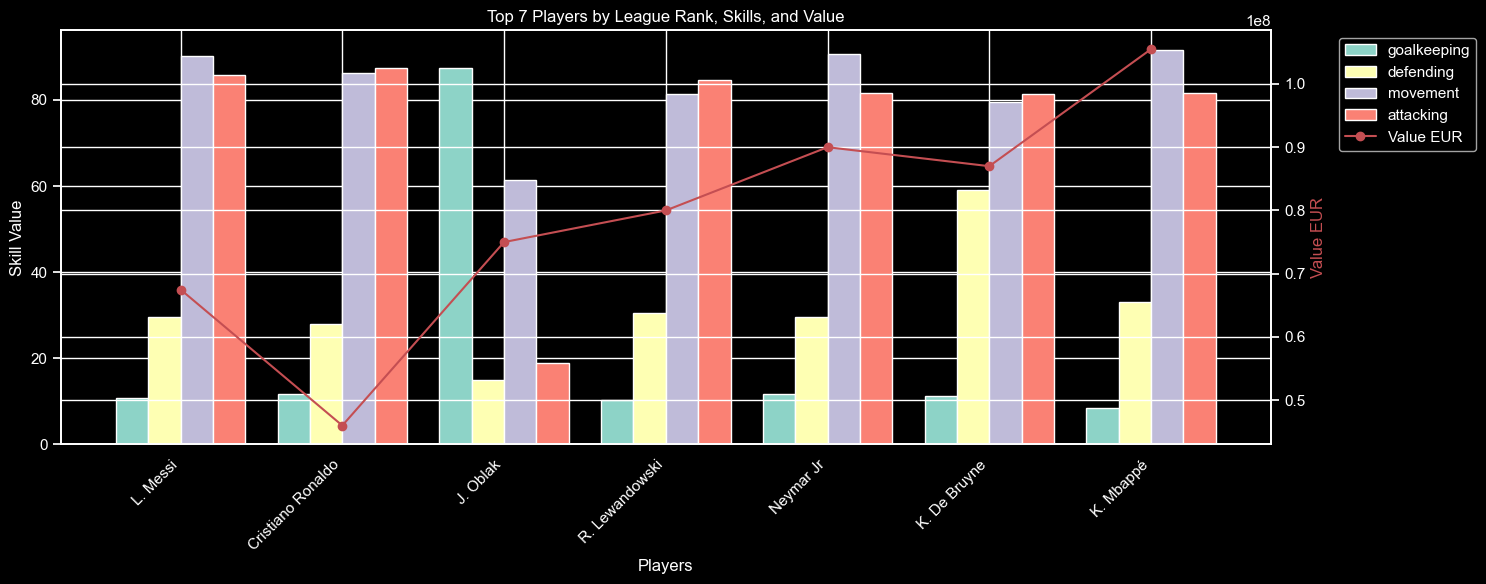

In [34]:
top_players = df.nsmallest(7, 'league_rank')
skills = ['goalkeeping', 'defending', 'movement', 'attacking']

fig, ax1 = plt.subplots(figsize=(15, 6))
bar_width = 0.2
index = np.arange(len(top_players))

for i, skill in enumerate(skills):
    ax1.bar(index + i*bar_width, top_players[skill], bar_width, label=skill)

ax2 = ax1.twinx()
ax2.plot(index + 1.5*bar_width, top_players['value_eur'], 'r-', marker='o', label='Value EUR')

ax1.set_xlabel('Players')
ax1.set_ylabel('Skill Value')
ax2.set_ylabel('Value EUR', color='r')
ax1.set_xticks(index + 1.5*bar_width)
ax1.set_xticklabels(top_players['short_name'], rotation=45, ha='right')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('Top 7 Players by League Rank, Skills, and Value')
plt.tight_layout()
plt.show()


### Value_EUR vs Skills Analysis

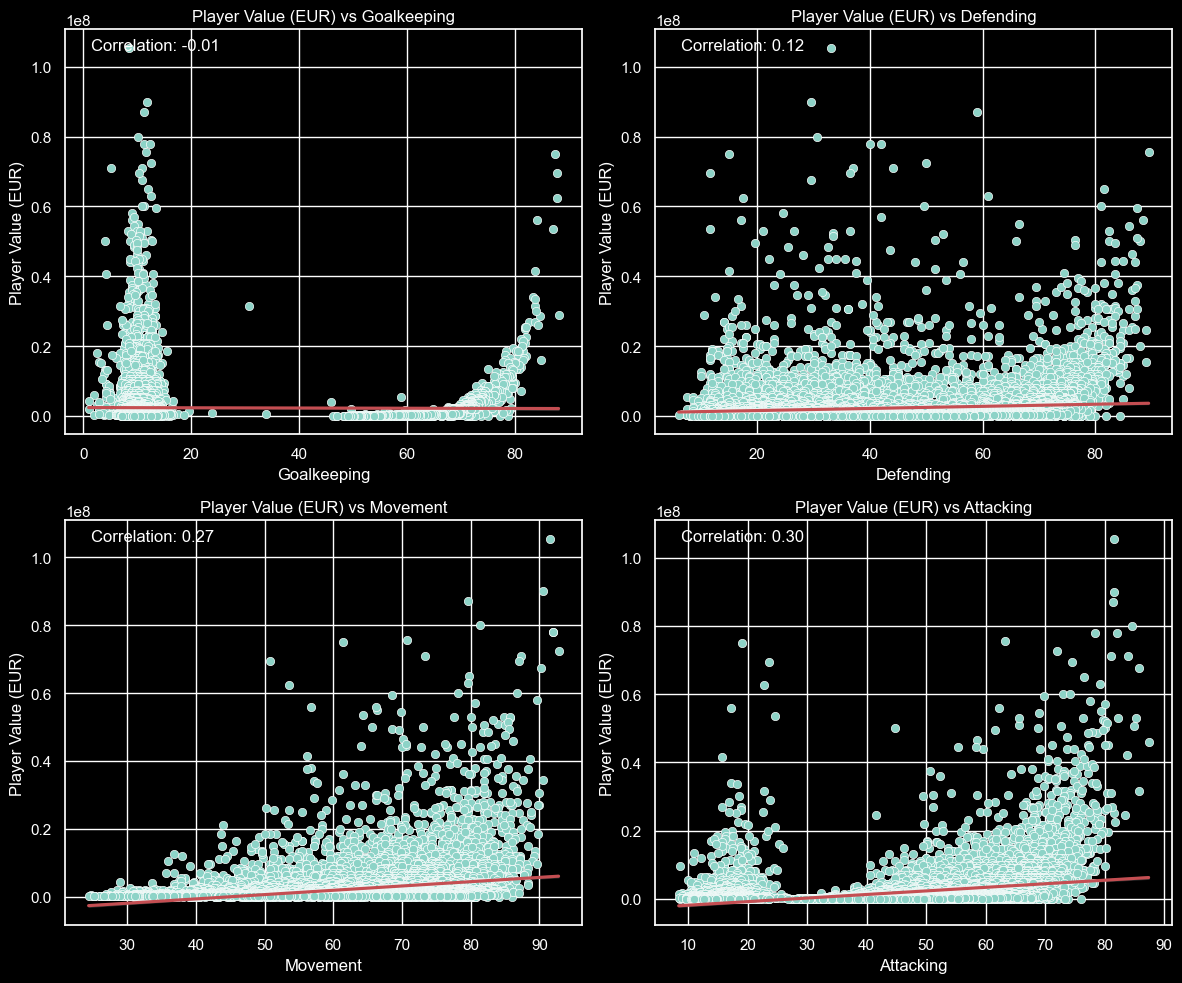

In [35]:
skills = ['goalkeeping', 'defending', 'movement', 'attacking']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, skill in enumerate(skills):
    sns.scatterplot(x=skill, y='value_eur', data=df, ax=axes[i])
    sns.regplot(x=skill, y='value_eur', data=df, ax=axes[i], scatter=False, color='r')
    axes[i].set_title(f'Player Value (EUR) vs {skill.capitalize()}')
    axes[i].set_xlabel(skill.capitalize())
    axes[i].set_ylabel('Player Value (EUR)')
    
    # Calculate correlation
    corr, _ = stats.pearsonr(df[skill], df['value_eur'])
    axes[i].annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')

plt.tight_layout()
plt.show()


### Correlation Analysis

Correlations with Player Value:
value_eur                   1.000000
overall                     0.633573
potential                   0.576426
international_reputation    0.565835
attacking                   0.298934
movement                    0.272461
defending                   0.121682
age                         0.083982
bmi                         0.065641
goalkeeping                -0.010400
Name: value_eur, dtype: float64


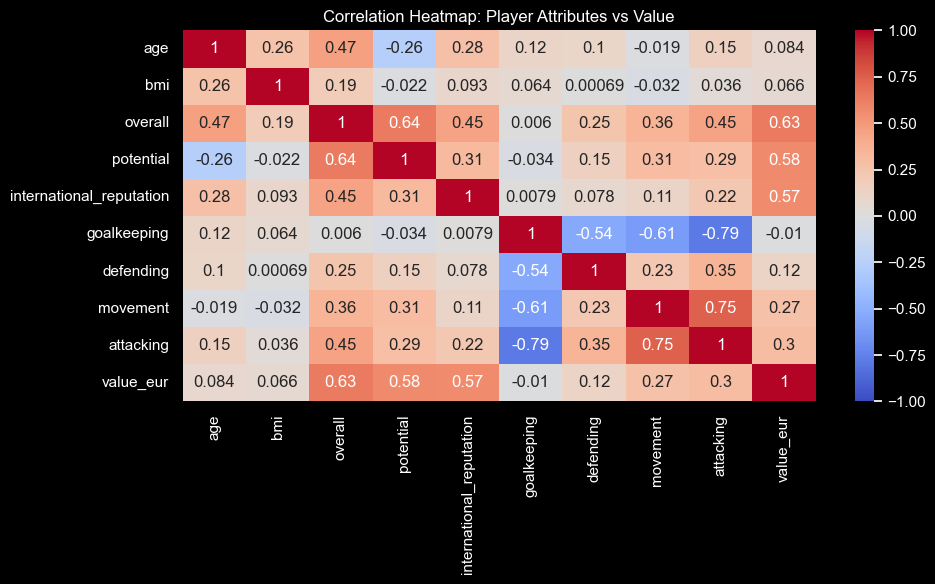

In [36]:
corr_columns = ['age', 'bmi', 'overall', 'potential', 'international_reputation', 
                'goalkeeping', 'defending', 'movement', 'attacking']
corr_matrix = df[corr_columns + ['value_eur']].corr()['value_eur'].sort_values(ascending=False)
print("Correlations with Player Value:")
print(corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(df[corr_columns + ['value_eur']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Player Attributes vs Value')
plt.tight_layout()
plt.show()


### Value Distribution

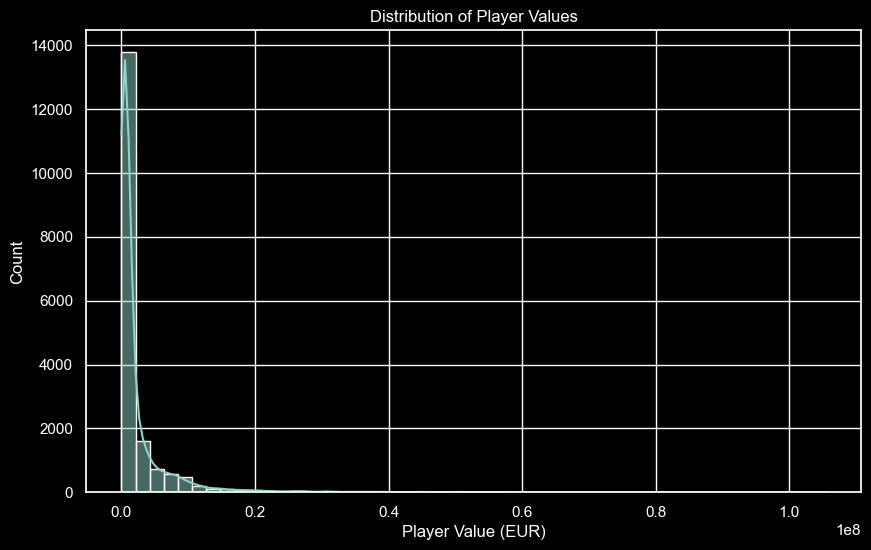

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['value_eur'], kde=True, bins=50)
plt.title('Distribution of Player Values')
plt.xlabel('Player Value (EUR)')
plt.ylabel('Count')
plt.show()

### Value by League Analysis

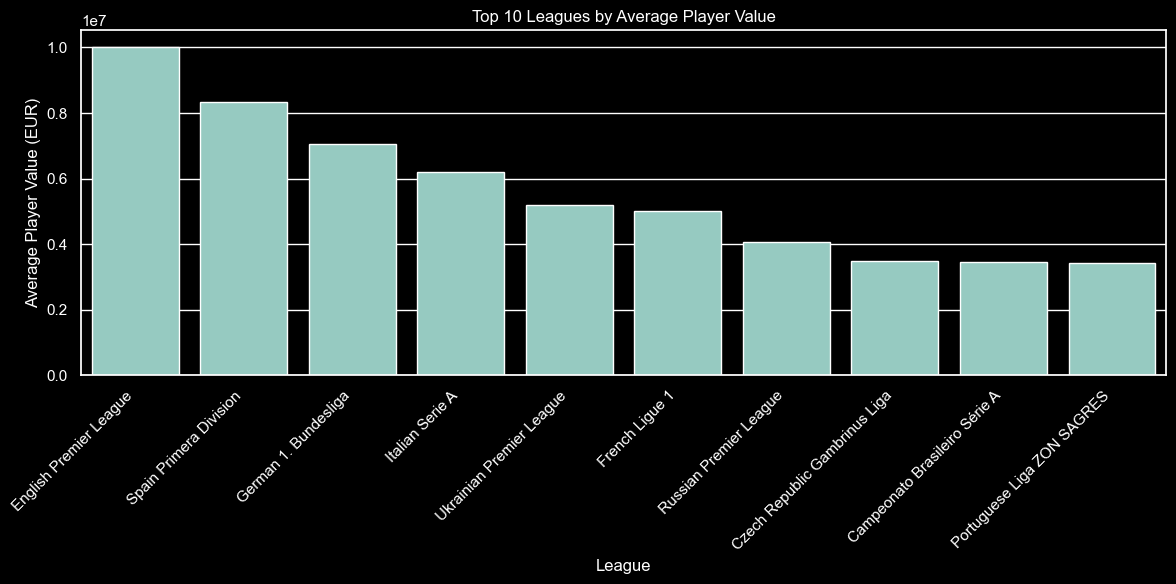

In [38]:
league_values = df.groupby('league_name')['value_eur'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=league_values.index, y='mean', data=league_values)
plt.title('Top 10 Leagues by Average Player Value')
plt.xlabel('League')
plt.ylabel('Average Player Value (EUR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
df.to_csv('clean_data.csv', index=False) 